In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def bresenham(x0, y0, x1, y1, n=None, antialiasing=False):
    
    # handle m>1 case and remember with a bool flag
    swap_xy = False
    if (y1-y0)/(x1-x0) > 1:
        x0, x1, y0, y1 = y0, y1, x0, x1
        swap_xy = True
    
    # define implicit line function
    def F(x, y):
        return y*(x1 - x0) + x*(y0 - y1) + y1*x0 - y0*x1        
    
    
    # setup and initial d
    y = y0
    d = F(x0+1, y0+0.5)
    
    # prepare result array
    if n is None:
        n = max(x1, y1) + 1
    
    I = np.zeros(shape=(n+2, n+2))
    
    # bresenham algorithm
    for x in range(x0, x1+1):
        if antialiasing:
            if x == x0:
                I[x, y] = 1
            a = d / (2 * (x1-x0))
            if d < 0:
                if a >= -0.5:
                    I[x+1, y] = 0.5 + a
                    I[x+1, y+1] = 0.5 - a
                else:
                    I[x+1, y+1] = 1.5 + a
                    I[x+1, y+2] = -0.5 - a
            elif d >= 0:
                if a <= 0.5:
                    I[x+1, y] = 0.5 + a
                    I[x+1, y+1] = 0.5 - a
                else:
                    I[x+1, y] = 1.5 - a
                    I[x+1, y-1] = a - 0.5
            
        elif not antialiasing:
            I[x, y] = 1
        
        
        if d<0:
            y = y + 1
            d = d + (x1 - x0) + (y0-y1)
                       
        else:
            d = d + (y0 - y1)
    
    # swap back if m>1
    if swap_xy:
        I = I.T

    # plot :)
    fig = plt.figure(figsize=(10,10)) 
    ax = fig.add_subplot(111) 
    ax.imshow((1-I).T, cmap="gray", origin='lower')
    
    # shifted coord system
    ax.set_xticks(np.arange(0.5, n+1.5, 1.0))
    ax.set_yticks(np.arange(0.5, n+1.5, 1.0))
    ax.grid()
    ax.tick_params(axis='x', colors=(0,0,0,0))
    ax.tick_params(axis='y', colors=(0,0,0,0))
    if swap_xy: 
        # if m>1, we need to adapt the line equation w.r.t the coord system
        ax.plot([y0, y1], [x0, x1])
    else:
        ax.plot([x0, x1], [y0, y1])
    plt.show() 
    
    return np.flip(I.T, axis=0) # return in coordinate system order


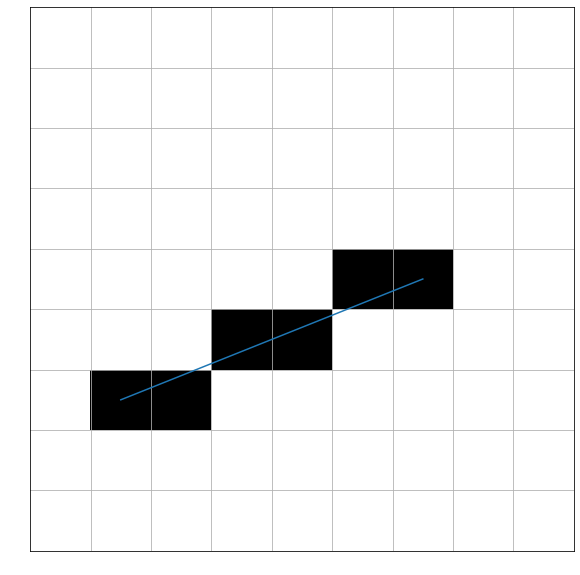

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
bresenham(x0=1, y0=2, x1=6, y1=4, antialiasing=False)    

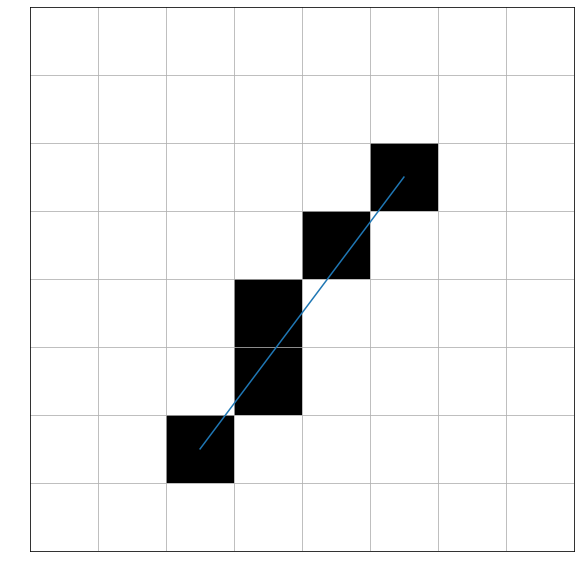

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
bresenham(x0=2, y0=1, x1=5, y1=5)

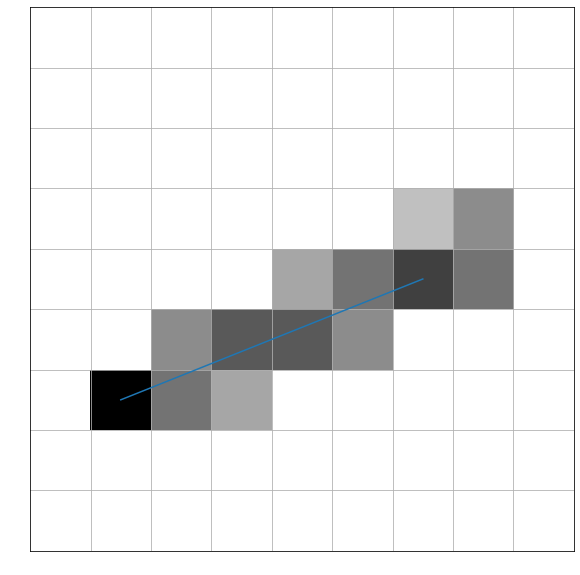

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.45, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.35, 0.55, 0.75, 0.55, 0.  ],
       [0.  , 0.  , 0.45, 0.65, 0.65, 0.45, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.55, 0.35, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [14]:
bresenham(x0=1, y0=2, x1=6, y1=4, antialiasing=True)

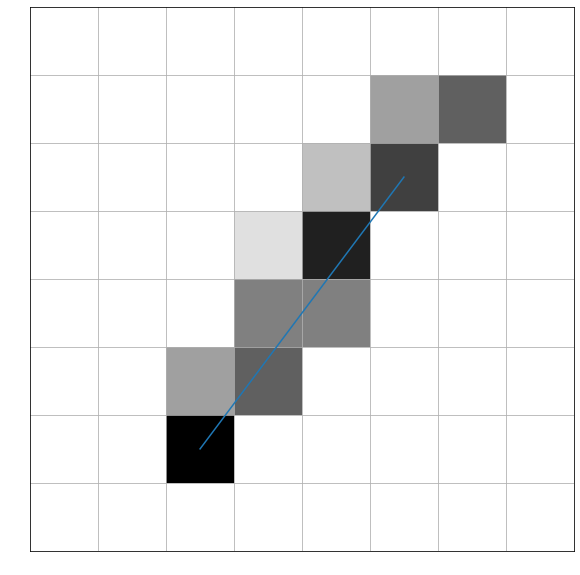

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.375, 0.625, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.25 , 0.75 , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.125, 0.875, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.5  , 0.5  , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.375, 0.625, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])

In [22]:
bresenham(x0=2, y0=1, x1=5, y1=5, antialiasing=True)

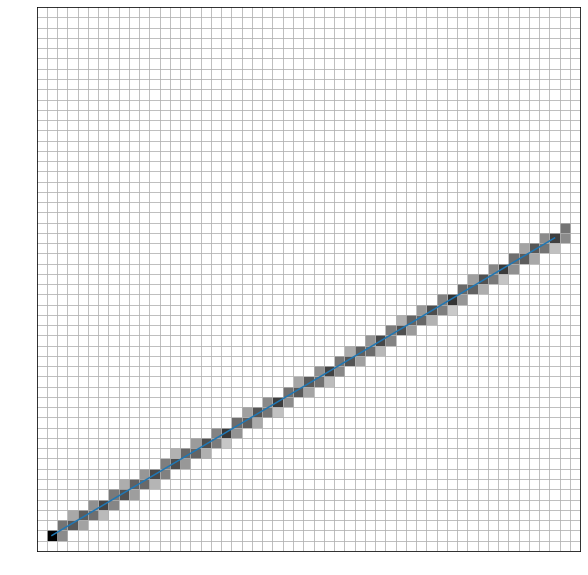

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.54591837, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.45408163, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
bresenham(x0=1, y0=1, x1=50, y1=30, antialiasing=True)

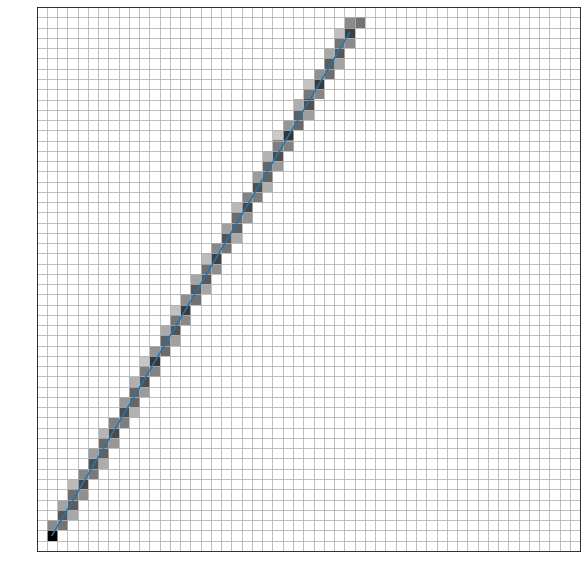

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.45408163, 0.54591837, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
bresenham(x0=1, y0=1, x1=30, y1=50, antialiasing=True)